In [11]:
import scipy.stats
from sklearn.mixture import BayesianGaussianMixture
import numpy
from matplotlib import pyplot as plt

In [39]:
class Gaussian:
    
    def __init__(self, mean, std):
        
        self.mean = mean
        self.std = std
    
    def sample(self, size):
        
        return numpy.random.normal(self.mean, self.std, size)
    
    def pdf(self, x):
        
        return scipy.stats.norm.pdf(x, self.mean, self.std)

In [88]:
g1 = Gaussian(0.0, 0.001)
g2 = Gaussian(0.01, 0.01)

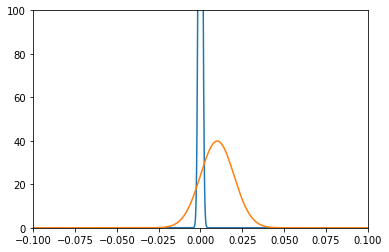

In [90]:
xx = numpy.linspace(-0.1, 0.1, 1000)

_ = plt.plot(xx, g1.pdf(xx))
_ = plt.plot(xx, g2.pdf(xx))

_ = plt.ylim(0, 100)
_ = plt.xlim(-0.1, 0.1)

In [196]:
samp1 = g1.sample(61000)
samp2 = g2.sample(1000)

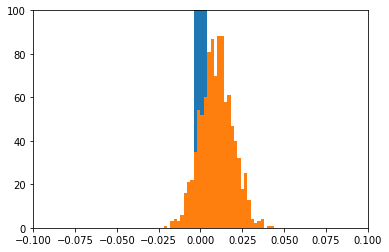

In [197]:
_ = plt.hist(samp1, range=(-0.1, 0.1), bins=100)
_ = plt.hist(samp2, range=(-0.1, 0.1), bins=100)

_ = plt.ylim(0, 100)
_ = plt.xlim(-0.1, 0.1)

In [203]:
bgmm = BayesianGaussianMixture(n_components=2, covariance_prior=[[0.8]], mean_prior=[0])
bgmm.fit(numpy.hstack([samp1, samp2]).reshape(-1, 1))

BayesianGaussianMixture(covariance_prior=[[0.8]], covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None, mean_prior=[0],
                        n_components=2, n_init=1, random_state=None,
                        reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [204]:
bgmm.means_

array([[7.13441850e-05],
       [1.94966869e-02]])

In [205]:
bgmm.covariances_

array([[[1.58723249e-05]],

       [[2.92262604e-03]]])

In [206]:
bgmm.weights_

array([0.99547826, 0.00452174])

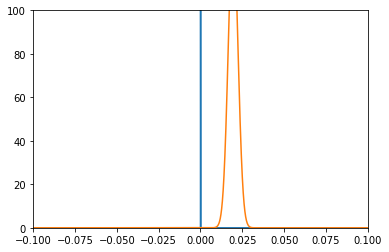

In [207]:
xx = numpy.linspace(-0.1, 0.1, 100000)

_ = plt.plot(xx, scipy.stats.norm.pdf(xx, bgmm.means_[0,0], bgmm.covariances_[0,0]))
_ = plt.plot(xx, scipy.stats.norm.pdf(xx, bgmm.means_[1,0], bgmm.covariances_[1,0]))

#_ = plt.hist(samp1, range=(-0.1, 0.1), bins=100)
#_ = plt.hist(samp2, range=(-0.1, 0.1), bins=100)

_ = plt.ylim(0, 100)
_ = plt.xlim(-0.1, 0.1)